# CS530 - Principles of AI 
### Roshan Patel
Assignment 1  
2017-10-03


In [1]:
import sys
ver_info = sys.version
print("This jupyter notebook was executed with:\n{0}".format(ver_info));

This jupyter notebook was executed with:
3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


## Problem Statement

Solve the following discrimination problem analytically and then write a program to input 100 data points sampled from each class distribution (using a random number generator), classifying them,  and computing the empirical error rate for each class, together with the average error rate for both classes using 
1. the training sample as the testing sample; and then using   
2. a leaving-one-out method comparing the following types of classifiers:  
    a. Naive Bayesian Classifier  
    b) One layer ANN

Two features:  N(mean,variance) = Normal distribution of variable with mean and variance as indicated for the specified parameters

P(x<sub>1</sub> | w<sub>1</sub>) = N (0, 1)

P(x<sub>1</sub> | w<sub>2</sub>) = N (1, 2)

P(x<sub>2</sub> | w<sub>1</sub>) = N (0,1)

P(x<sub>2</sub> | w<sub>2</sub>) = N (1, 2)

Under three very different assumptions about the prior probabilities of w1 and w2:

A. Class 1 P(w<sub>1</sub>)  = 0.9 and Class 2 P(w<sub>2</sub>) = 0.1  
B. Class 1 P(w<sub>1</sub>) =  0.1 and Class 2 P(w<sub>2</sub>) = 0.9  
C. Class 1 P(w<sub>1</sub>) = 0.5 and Class 2 P(w<sub>2</sub>) = 0.5  


Graph the analytic solution and superimpose for both discriminants the results for the 200 points of both classes so as to show the differences in results for the two types of classifiers and the three variations in prior probabilities. Plot the error rate estimates for both types of estimates for the three types of error rates (individual classes and average) separately so as to show the contrasts there.

Choose carefully how you summarize both graphically and in writing the comparisons so as to show the contrast between the different results.

Explain in a long paragraph or half a page what this simple analytical example demonstrates for practical prediction problems

 



---

## Sample distribution  

A sample distribution of 200 points (100 per class) will be generated using the numpy.random package's uniform distribution sampler. 

In [2]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def generate_sample_set(mu, variance, priors):
    uniform_rands = [np.zeros(4)]*4

    for i in range(4):
        if i in (0, 2):
            set_size = SAMPLE_SET_SIZE*priors[0]
        else: 
            set_size = SAMPLE_SET_SIZE*priors[1]
        uniform_rands[i] = np.random.normal(mu[i], variance[i], int(set_size)) 

        headers = "x1 x2 class".split()
    class1 = pd.DataFrame({'x1': uniform_rands[0], 'x2': uniform_rands[2], 
                          'class': 'w1'}, columns=headers)
    class2 = pd.DataFrame({'x1': uniform_rands[1], 'x2': uniform_rands[3], 
                          'class': 'w2'}, columns=headers)
    class2.index=class2.index+int(SAMPLE_SET_SIZE/2)

    return pd.concat([class1, class2])



# Sample set parameters  
SAMPLE_SET_SIZE = 100
mu = [0, 1, 0, 1]
variance = [1, 2, 1, 2]
priors = [0.5, 0.5]


# Linearlly separable sample set 
# mu = [0, 4, 0, 4]
# variance = [1, 1, 1, 1]



sample_set = generate_sample_set(mu, variance, priors)

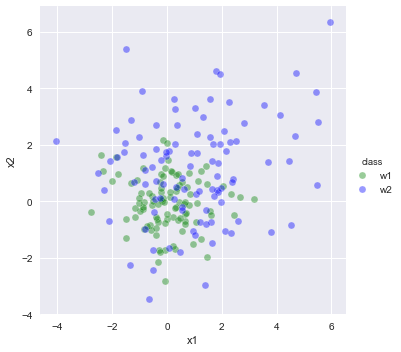

In [4]:
colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=0.4, linewidth=0.5, edgecolor='white')
g.add_legend()


The plot above shows the fake sampled data.  There are 200 points, half of which belong to class w1 and the other half belong to class w2.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


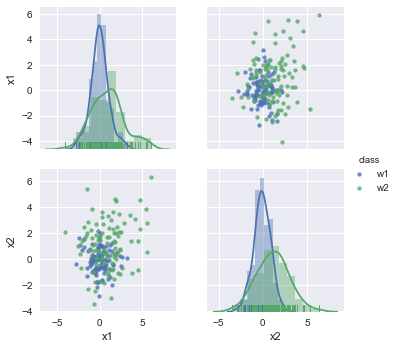

In [5]:
g = sns.PairGrid(sample_set, hue='class')
g.map_diag(sns.distplot, kde=True, rug=True)
g.map_offdiag(plt.scatter, alpha=0.8,s=15)
g.add_legend()             


As a sanity check, I verified the distribution of the fake sampled data visually in the plots above.  The diagonal shows histograms and density estimate functions for feature x1 in figure (1,1) and x2 in figure (2,2).  The estimate density function should roughly mimick the type of normal distributions specified in the problem statement.  This does, indeed, seem to be the case.




# Naive Bayesian Classifier 

# Single Layer ANN

In [6]:
# Implementing single layer ANN class
# Simple perceptron learning rule using a unit-step function for each neuron's activation function 


class singleLayerANN(object):
    
    def __init__(self, learning_rate=0.1, cycles=50):
        self.learning_rate = learning_rate
        self.cycles = cycles

        
    def train_on_sample(self, X, omega, cost):
        
        self.w_ = np.zeros(X.shape[1] + 1)
        self.error = []
        self.misclass1 = 0
        self.misclass2 = 0
        self.correct1 = 0
        self.correct2 = 0
        
        for _ in range(self.cycles):
            cycle_error = 0

            
            for x_i, target in zip(X, omega):
                deltaWeight = self.learning_rate * (target - self.predict(x_i))
                
                
                if(deltaWeight != 0.0 and target == 1):
                    # Guessed class 2, target was class 1
                    self.w_[1:] += deltaWeight * x_i * cost[0]
                    self.w_[0] += deltaWeight * cost[0]
                    self.misclass1 += 1
                elif(deltaWeight != 0.0 and target == -1):
                    # Guessed class 1, target was class 2
                    self.w_[1:] += deltaWeight * x_i * cost[1]
                    self.w_[0] += deltaWeight * cost[1]
                    self.misclass2 += 1
                elif(deltaWeight == 0.0 and target == 1):
                    # Guessed class 1 correctly 
                    self.correct1 += 1
                elif(deltaWeight == 0.0 and target == -1):
                    # Guessed class 2 correctly 
                    self.correct2 += 1
                else:
                    self.w_[1:] += deltaWeight * x_i
                    self.w_[0] += deltaWeight 
                    self.correct += 1
                
                cycle_error += int(deltaWeight != 0.0)
            
            self.error.append(cycle_error)
    
        return self
    
    
    def predict(self, X):
        return np.where(self.linear_sum(X) >= 0.0, 1, -1)
        
        
    def linear_sum(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        

## 1.  sample_set = training_set
+ Using the entire sample_set (200 points) to create the ANN classifer.

In [7]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)


The resulting weight vector: [ 2.24       -1.318552   -0.67666868]
Guessed class 1 (1) wrong: 152		Right: 9948
Guessed class 2 (-1) wrong: 7488	Right : 2612
Correct: 9948


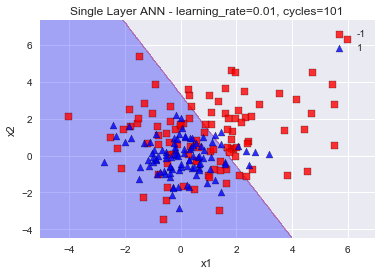

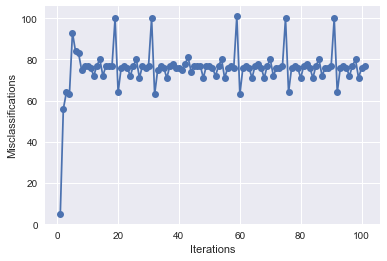

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

X = training_set.iloc[0:SAMPLE_SET_SIZE+1, [0, 1]].values
omega = training_set.iloc[0:SAMPLE_SET_SIZE+1, 2].values


LEARNING_RATE = 0.01
CYCLES = 101
# [error of misclassing true class 1, error of misclassing true class 2]
errcost = [50, 1]

slANN = singleLayerANN(learning_rate=LEARNING_RATE, cycles=int(CYCLES))
slANN.train_on_sample(X=X, omega=omega, cost=errcost)

print("The resulting weight vector: {0}".format(slANN.w_))
print("Guessed class 1 (1) wrong: {0}\t\tRight: {2}\nGuessed class 2 (-1) wrong: {1}\tRight : {3}\nCorrect: {2}"
      .format(slANN.misclass1, slANN.misclass2, slANN.correct1, slANN.correct2))

plot_decision_regions(X, omega, clf=slANN)
plt.title('Single Layer ANN - learning_rate={0}, cycles={1}'.format(LEARNING_RATE, CYCLES))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.plot(range(1, len(slANN.error)+1), slANN.error, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()



In [20]:
from sklearn.model_selection import LeaveOneOut

def loo_cross_validation(sample_set, learning_rate, cycles, errocost):
    loo = LeaveOneOut()
    correctclass1 = correctclass2 = incorrectclass1 = incorrectclass2 = 0

    training_set = pd.DataFrame.copy(sample_set)
    training_set['class'] = training_set['class'].replace('w1', 1)
    training_set['class'] = training_set['class'].replace('w2', -1)
    
    loo.get_n_splits(training_set)

    for train_index, test_index in loo.split(training_set):
    #     print("train index: {0}, test index: {1}".format(train_index, test_index))

        loo_training_set = training_set.drop(test_index)   
        X = loo_training_set.iloc[0:SAMPLE_SET_SIZE, [0, 1]].values
        omega = loo_training_set.iloc[0:SAMPLE_SET_SIZE, 2].values

        LEARNING_RATE = 0.01
        CYCLES = 101
        # [error of misclassing true class 1, error of misclassing true class 2]
        errcost = [50, 1]

        slANN = singleLayerANN(learning_rate=LEARNING_RATE, cycles=int(CYCLES))
        slANN.train_on_sample(X=X, omega=omega, cost=errcost)



        testpoint = training_set.iloc[test_index[0]]
        testval = slANN.predict([testpoint['x1'], testpoint['x2']])
        if testval == testpoint['class'] == 1.0:
            correctclass1 += 1
        elif testval == testpoint['class'] == -1.0:
            correctclass2 += 1
        elif testval != testpoint['class'] and testpoint['class'] == 1.0:
            incorrectclass1 += 1
        elif testval != testpoint['class'] and testpoint['class'] == -1.0:
            incorrectclass2 += 1
        
        print("Completed slANN cross-validation for {0}".format(test_index))

    return correctclass1, correctclass2, incorrectclass1, incorrectclass2



In [21]:
LEARNING_RATE = 0.01
CYCLES = 101
# [error of misclassing true class 1, error of misclassing true class 2]
errcost = [50, 1]

c1, c2, inc1, inc2 = loo_cross_validation(sample_set, LEARNING_RATE, CYCLES, errcost)


Completed slANN cross-validation for [0]
Completed slANN cross-validation for [1]
Completed slANN cross-validation for [2]
Completed slANN cross-validation for [3]
Completed slANN cross-validation for [4]
Completed slANN cross-validation for [5]
Completed slANN cross-validation for [6]
Completed slANN cross-validation for [7]
Completed slANN cross-validation for [8]
Completed slANN cross-validation for [9]
Completed slANN cross-validation for [10]
Completed slANN cross-validation for [11]
Completed slANN cross-validation for [12]
Completed slANN cross-validation for [13]
Completed slANN cross-validation for [14]
Completed slANN cross-validation for [15]
Completed slANN cross-validation for [16]
Completed slANN cross-validation for [17]
Completed slANN cross-validation for [18]
Completed slANN cross-validation for [19]
Completed slANN cross-validation for [20]
Completed slANN cross-validation for [21]
Completed slANN cross-validation for [22]
Completed slANN cross-validation for [23]
Co

In [10]:
training_set.iloc[10]['x2']

0.95756087357907482

In [ ]:
c2

In [11]:
# How to plot line using weights from perceptron 


# A = slANN.w_[0]
# B = slANN.w_[1]
# C = slANN.w_[2]

# pies = np.linspace(-7, 7) 
# skies = (A + B*pies)/(-C)
# plt.plot(pies, skies, 'ro')